In [1]:
import warnings
warnings.filterwarnings("ignore")


<img src="https://datascientest.fr/train/assets/logo_datascientest.png" style="height:150px"> 
<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center" >  Machine Learning pour les Data Engineers </h1> 
<h2 style = "text-align:center"> Etude de cas : problème de régression </h2> 
<hr style="border-width:2px;border-color:#75DFC1">

> Dans cet exercice nous allons résoudre une problématique métier à l'aide d'une régression.


<h3> 1. Présentation du problème </h3>

>Contrairement à la partie précédente, nous nous positionnons ici sur une problématique de régression. Nous nous mettons dans la peau d'une entreprise voulant évaluer **des prix de voitures** en fonction de certaines données relatives au produit. Cette démarche peut être utile pour évaluer l'évolution du prix du marché et noter les variables importantes dans la décision de l'achat d'une voiture. La base de donnée que nous utiliserons s'appelle `'carprices.csv'` et les différentes variables sont les suivantes :
>
>|  <p class="text-center">Nom de la colonne</p> | <p class="text-center">Description</p>|
|:---:|:---:|
|   <p class="text-center">Unnamed: 0</p> | <p class="text-center">Identifiant du client</p> |
|  <p class="text-center">doornumber</p> | <p class="text-center">Le nombre de portes</p>   |
|  <p class="text-center">fueltype | <p class="text-center">Le type de carburant</p>  |
|  <p class="text-center">aspiration  |  <p class="text-center">Le type d'aspiration</p>  |
|  <p class="text-center">cylindernumber</p> |  <p class="text-center"> Le nombre de cylindres</p> |
|  <p class="text-center">wheelbase</p> |  <p class="text-center">L'empattement des roues</p>  |
|  <p class="text-center">carlength</p> |  <p class="text-center">La longueur de la voiture </p> |
|  <p class="text-center">carwidth</p> |  <p class="text-center">La largeur de la voiture</p>  |
|  <p class="text-center">carheight</p> |  <p class="text-center">La hauteur de la voiture</p> |
|  <p class="text-center">curbweight</p> | <p class="text-center">La masse à vide du véhicule</p>  |
|  <p class="text-center">price</p> | <p class="text-center">Variable cible : le prix du véhicule  |

* **(a)** Exécuter la cellule suivante pour importer les package nécessaires.




In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
%matplotlib inline


* **(b)** Lire le fichier `'carprices.csv'` dans un *`DataFrame`* et en afficher les premières lignes.




In [2]:
# Insérez votre code ici




df = pd.read_csv('carprices.csv')
df.head()

,Unnamed: 0,doornumber,fueltype,aspiration,cylindernumber,wheelbase,carlength,carwidth,carheight,curbweight,price
0,0,two,gas,std,four,88.6,168.8,64.1,48.8,2548,13495.0
1,1,two,gas,std,four,88.6,168.8,64.1,48.8,2548,16500.0
2,2,two,gas,std,six,94.5,171.2,65.5,52.4,2823,16500.0
3,3,four,gas,std,four,99.8,176.6,66.2,54.3,2337,13950.0
4,4,four,gas,std,five,99.4,176.6,66.4,54.3,2824,17450.0


In [ ]:
df = pd.read_csv('carprices.csv')
df.head()



<h3> 2. Préparation des données </h3> 

> La colonne `'Unnamed: 0'` est sans importance pour notre problème : elle correspond à un indice de création de la table. Deux options s'offrent à nous, nous pouvons soit la supprimer soit la passer en colonne d'index. 


* **(c)** Choisisser l'option que vous souhaitez effectuer sur la colonne `Unnamed: 0` et exécutez la.



In [3]:
# Insérez votre code ici


#Suppression de la colonne
df = df.drop('Unnamed: 0',axis = 1)

#Passage de la colonne en indice
#df.set_index(['Unnamed: 0'], inplace=True)

In [ ]:
#Suppression de la colonne
df = df.drop('Unnamed: 0',axis = 1)

#Passage de la colonne en indice
#df.set_index(['Unnamed: 0'], inplace=True)



> Les variables `doornumber` et `cylindernumber` sont des **strings** correspondant respectivement au nombre de portes et au nombre de cylindres.  

* **(d)** Afficher les modalités prises par les variables `doornumber` et  `cylindernumber` et les remplacer de la manière la plus cohérente possible.  




In [4]:
df['cylindernumber'].value_counts() 

df['doornumber'].value_counts()

def replace_integer(x):
    if x == 'two':
        return 2
    if x == 'three':
        return 3
    if x == 'four':
        return 4
    if x == 'five':
        return 5
    if x == 'six':
        return 6
    if x == 'eight':
        return 8
    if x == 'twelve':
        return 12
    
df['doornumber'] = df['doornumber'].apply(replace_integer)
df['cylindernumber'] = df['cylindernumber'].apply(replace_integer)

In [ ]:
df['cylindernumber'].value_counts() 

df['doornumber'].value_counts()

def replace_integer(x):
    if x == 'two':
        return 2
    if x == 'three':
        return 3
    if x == 'four':
        return 4
    if x == 'five':
        return 5
    if x == 'six':
        return 6
    if x == 'eight':
        return 8
    if x == 'twelve':
        return 12
    
df['doornumber'] = df['doornumber'].apply(replace_integer)
df['cylindernumber'] = df['cylindernumber'].apply(replace_integer)



* **(f)** Séparer les données en un DataFrame *feats* contenant les variables explicatives et un dataframe *target* contenant la variable cible **`price`**.




In [5]:
feats = df.drop('price', axis=1)
target = df['price']

In [ ]:
feats = df.drop('price', axis=1)
target = df['price']



* **(g)** Créer un ensemble d'entraînement et un ensemble de test correspondant respectivement à 75% et 25% des données.




In [6]:
# Insérez votre code ici

X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.25, random_state = 42)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.25, random_state = 42)



> Comme expliqué dans le notebook précédent, nos algorithmes fonctionnent sur des calculs et ne prennent en entrée que des valeurs numériques, les chaines de caractères ne pouvant pas être traitées. Il est donc important d'encoder les variables catégorielles que nous voulons utiliser.

* **(m)** Encoder les modalités des variables explicatives `fueltype`, `aspiration` à l'aide d'un **`OneHotEncoder`** en **estimant l'encodage sur le jeu d'entraînement** et en l'appliquant sur le **jeu d'entraînement et de test**. 


><div class="alert alert-success">
<i class="fa fa-question-circle"></i> &emsp; 
    Nous avons vu dans les <b>notebooks 4 et 5</b>, l'utilisation du <code>OneHotEncoder</code> pour l'encodage des variables explicatives. 
</div>




In [7]:
#premiere strategie
from sklearn.preprocessing import OneHotEncoder

# Le paramètre drop = 'first' permet de supprimer l'une des colonnes créée par le OneHotEncoder
# et donc d'éviter un problème de multicolinéarité
oneh = OneHotEncoder(drop = 'first', sparse=False)

cat = ['fueltype', 'aspiration']

X_train.loc[:,cat] = oneh.fit_transform(X_train[cat])

X_test.loc[:,cat] = oneh.transform(X_test[cat])


#deuxieme strategie
#def replace_fueltype(x):
#    if x == 'diesel':
#        return 0
#    if x == 'gas':
#        return 1
#    
#def replace_aspiration(x):
#    if x == 'std':
#        return 0
#    if x == 'turbo':
#        return 1
#    
#X_train['fueltype'] = X_train['fueltype'].apply(replace_fueltype)
#X_train['aspiration'] = X_train['aspiration'].apply(replace_aspiration)
#X_test['fueltype'] = X_test['fueltype'].apply(replace_fueltype)
#X_test['aspiration'] = X_test['aspiration'].apply(replace_aspiration)


In [ ]:
#premiere strategie
from sklearn.preprocessing import OneHotEncoder

# Le paramètre drop = 'first' permet de supprimer l'une des colonnes créée par le OneHotEncoder
# et donc d'éviter un problème de multicolinéarité
oneh = OneHotEncoder(drop = 'first', sparse=False)

cat = ['fueltype', 'aspiration']

X_train.loc[:,cat] = oneh.fit_transform(X_train[cat])

X_test.loc[:,cat] = oneh.transform(X_test[cat])


#deuxieme strategie
#def replace_fueltype(x):
#    if x == 'diesel':
#        return 0
#    if x == 'gas':
#        return 1
#    
#def replace_aspiration(x):
#    if x == 'std':
#        return 0
#    if x == 'turbo':
#        return 1
#    
#X_train['fueltype'] = X_train['fueltype'].apply(replace_fueltype)
#X_train['aspiration'] = X_train['aspiration'].apply(replace_aspiration)
#X_test['fueltype'] = X_test['fueltype'].apply(replace_fueltype)
#X_test['aspiration'] = X_test['aspiration'].apply(replace_aspiration)



* **(h)** Appliquer une standardisation à l'aide de `StandardScaler` en **estimant les paramètres sur le jeu d'entraînement** et en l'appliquant sur le **jeu d'entraînement et de test** sur les variables `'doornumber'`, `'cylindernumber'`, `'wheelbase'`, `'carlength'`,`'carwidth'`, `'carheight'`, `'curbweight'`. 

><div class="alert alert-success">
<i class="fa fa-question-circle"></i> &emsp; 
    Nous avons vu dans les <b>notebook 4  et 5</b>, l'utilisation du <code>StandardScaler</code> pour la standardisation. 
</div>



In [8]:
# Insérez votre code ici

sc = StandardScaler()

num = ['doornumber', 'cylindernumber', 'wheelbase', 'carlength','carwidth', 'carheight', 'curbweight']
X_train.loc[:,num] = sc.fit_transform(X_train[num])
X_test.loc[:,num] = sc.transform(X_test[num])

In [ ]:
sc = StandardScaler()

num = ['doornumber', 'cylindernumber', 'wheelbase', 'carlength','carwidth', 'carheight', 'curbweight']
X_train.loc[:,num] = sc.fit_transform(X_train[num])
X_test.loc[:,num] = sc.transform(X_test[num])





<h3> 2. Régression </h3> 

> <h4> 2.1. Régression linéaire </h4>

* **(a)** Instancier un modèle `LinearRegression` de régression linéaire et entrainez le sur vos données d'entrainement.



In [9]:
# Insérez votre code ici


from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)



> Le modèle **regressor** créé possède les attributs `intercept_` et `coef_` qui correspondent à l'ordonnée à l'origine et la pente de la droite dans le cas d'une régression linéaire.

* **(c)** Afficher l'intercept ainsi que les coefficients de chaque variable estimée par le modèle.



In [10]:
# Insérez votre code ici


coeffs = list(regressor.coef_)
coeffs.insert(0, regressor.intercept_)

feats2 = list(feats.columns)
feats2.insert(0, 'intercept')

pd.DataFrame({'valeur estimée': coeffs}, index=feats2)

,valeur estimée
intercept,12555.487890
doornumber,-606.063681
fueltype,895.563409
aspiration,-43.093498
cylindernumber,2098.500804
wheelbase,-1338.713393
carlength,375.044782
carwidth,1795.781951
carheight,22.845465
curbweight,4570.686263


In [ ]:
coeffs = list(regressor.coef_)
coeffs.insert(0, regressor.intercept_)

feats2 = list(feats.columns)
feats2.insert(0, 'intercept')

pd.DataFrame({'valeur estimée': coeffs}, index=feats2)



>L'intercept représente la valeur moyenne de la variable cible lorsque toutes les variables prédictives du modèle sont égales à zéro. Donc si toutes les variables explicatives sont à zéro, le modèle prédira le prix d'une voiture à 12555.
>
> Pour la suite des coefficients, nous pouvons les interpréter de la manière suivante : lorsque la variable en question augmente d'une unité, le prix de la voiture évolue en suivant le coefficient. Par exemple, si **`curbweight`**  augmente d'une unité, le prix en sera augmenté de 4570 unités selon notre modèle. Cela nous renseigne sur le poids des variables dans le choix de la régression.


* **(d)** Afficher le score (R²) du modèle sur le jeu de données de d'entraînement et de test.



In [11]:
# Insérez votre code ici

print('Coefficient de détermination du modèle sur train:', regressor.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', regressor.score(X_test, y_test))

Coefficient de détermination du modèle sur train: 0.7798066865864163
Coefficient de détermination du modèle sur test: 0.7720051355565609


In [ ]:
print('Coefficient de détermination du modèle sur train:', regressor.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', regressor.score(X_test, y_test))



> Plus le **coefficient de détermination** est proche de 1, plus les données collent à la droite de régression. 

* **(g)** 
    * (1) Stocker les prédictions du modèle pour `X_test` dans une variable nommé **`pred_test`**.
    * (2) Afficher dans un graphique le nuage de points entre **`pred_test`** et **`y_test`**.
    * (3) Ajouter sur ce graphique la droite d'équation  $y = x$.
    
    
><div class="alert alert-success">
<i class="fa fa-question-circle"></i> &emsp; 
    Si les prédictions sont bonnes, les points devraient être proches de cette droite.
</div>




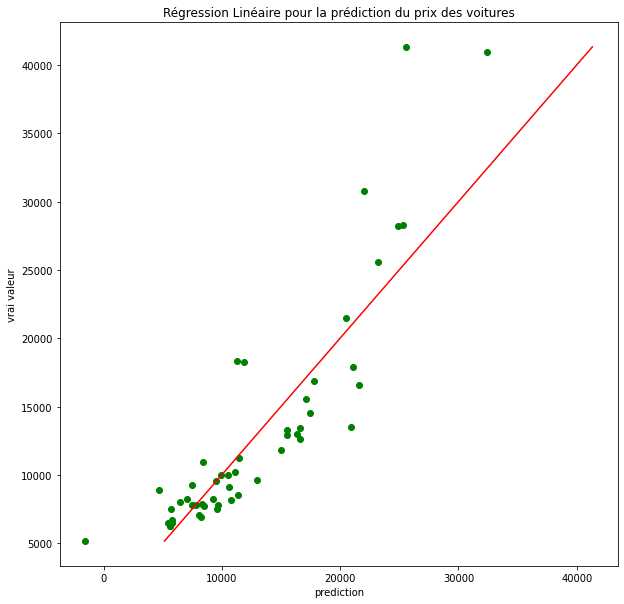

In [12]:
fig = plt.figure(figsize = (10,10))
pred_test = regressor.predict(X_test)
plt.scatter(pred_test, y_test, c='green')

plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), color = 'red')
plt.xlabel("prediction")
plt.ylabel("vrai valeur")
plt.title('Régression Linéaire pour la prédiction du prix des voitures')

plt.show()

In [ ]:
fig = plt.figure(figsize = (10,10))
pred_test = regressor.predict(X_test)
plt.scatter(pred_test, y_test, c='green')

plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), color = 'red')
plt.xlabel("prediction")
plt.ylabel("vrai valeur")
plt.title('Régression Linéaire pour la prédiction du prix des voitures')

plt.show()



>On observe que les voitures les moins chères ainsi que les voitures au prix moyen sont globalement bien prédites. Cependant, les voitures les plus chères sont en général sous-évaluées.
><h4> 2.2 DecisionTreeRegressor </h4>
>
>Nous avons vu dans les notebooks précédents que  le concept d'arbres de décisions peut être utilisé dans un problème de classification et de régression. L'idée est la même pour la classification que pour la régression, mais nous nous entraînons ici à prédire des valeurs continues en réduisant l'erreur plutôt que de chercher à attribuer des classes.

* **(a)** 
    * (1) Instancier un objet `DecisionTreeRegressor` de la bibliothèque `sklearn.tree` et entraînez le sur vos données d'entraînement.
    * (2) Évaluer le modèle à l'aide de la méthode `score` sur les données d'entraînement et de test.




In [13]:
from sklearn.tree import DecisionTreeRegressor 
  
regressor = DecisionTreeRegressor(random_state=42) 
  
regressor.fit(X_train, y_train)

#On observe un réel overfitting
print(regressor.score(X_train,y_train))
print(regressor.score(X_test,y_test))

0.9986373476589139
0.83953376902667


In [ ]:
from sklearn.tree import DecisionTreeRegressor 
  
regressor = DecisionTreeRegressor(random_state=42) 
  
regressor.fit(X_train, y_train)

#On observe un réel overfitting
print(regressor.score(X_train,y_train))
print(regressor.score(X_test,y_test))



> Comme dans le notebook précédent, nous pouvons calculer l'importance de chacune des variables grâce à l'attribut
`feature_importances_` de notre arbre de décision.

* **(b)** Utiliser l'arbre de décision pour afficher l'importance des toutes les variables.





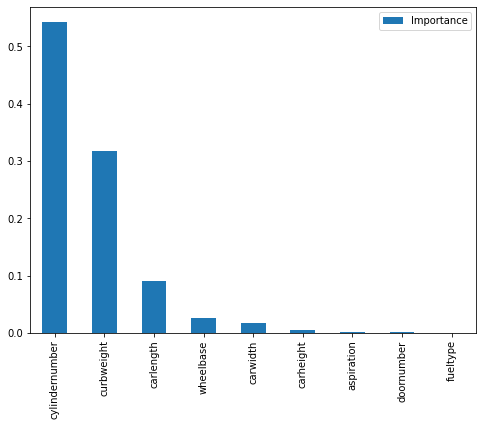

In [14]:
feat_importances = pd.DataFrame(regressor.feature_importances_, index=feats.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))
plt.show()

In [ ]:
feat_importances = pd.DataFrame(regressor.feature_importances_, index=feats.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))
plt.show()


> Les variables les plus importantes pour l'algorithme sont `cylindernumber`, `curbweight`, `carlength` et `wheelbase`. D'un point de vue business, ce sont donc les critères qui vont le plus impacter le prix d'une voiture. 
Nous pouvons également utiliser ces importances pour tenter de réduire la taille de notre base de données, ce qui pourrait être utile dans le cas d'un volume de données nécessitant un temps de calcul important.

* **(c)** Réentrainer votre modèle en ne gardant que les quatre variables les plus importantes, comparez ces résultats avec le modèle précédent. Que pouvez-vous conclure ? 



In [15]:
from sklearn.tree import DecisionTreeRegressor 


X_train_reduced = X_train[['cylindernumber','curbweight','carlength','carwidth']].copy()
X_test_reduced = X_test[['cylindernumber','curbweight','carlength','carwidth']].copy()

regressor = DecisionTreeRegressor(random_state=42) 
  
regressor.fit(X_train_reduced , y_train)

print(regressor.score(X_train_reduced,y_train))
print(regressor.score(X_test_reduced,y_test))

0.9986244467008634
0.8601284191380172


In [ ]:
from sklearn.tree import DecisionTreeRegressor 


X_train_reduced = X_train[['cylindernumber','curbweight','carlength','carwidth']].copy()
X_test_reduced = X_test[['cylindernumber','curbweight','carlength','carwidth']].copy()

regressor = DecisionTreeRegressor(random_state=42) 
  
regressor.fit(X_train_reduced , y_train)

print(regressor.score(X_train_reduced,y_train))
print(regressor.score(X_test_reduced,y_test))



> Nous pouvons observer que nous ne perdons pas la performance de notre modèle en enlevant un certain nombre de données, encore mieux, **les résultats sont meilleurs**. La réduction de la dimension de notre jeu de donnée peut donc être **une étape cruciale** dans l'élaboration de notre modèle.
>
>Nous pouvons à présent afficher l'arbre correspondant aux différentes séparations avec le nombre de variables réduit. De même que dans le notebook précedent, pour des soucis de clarté, nous ré-instancions un modèle avec une profondeur maximale égale à 3.
>La cellule de code pour l'afficher est la suivante :

* **(d)** Exécuter la cellule de code suivante pour afficher l'arbre de décision.



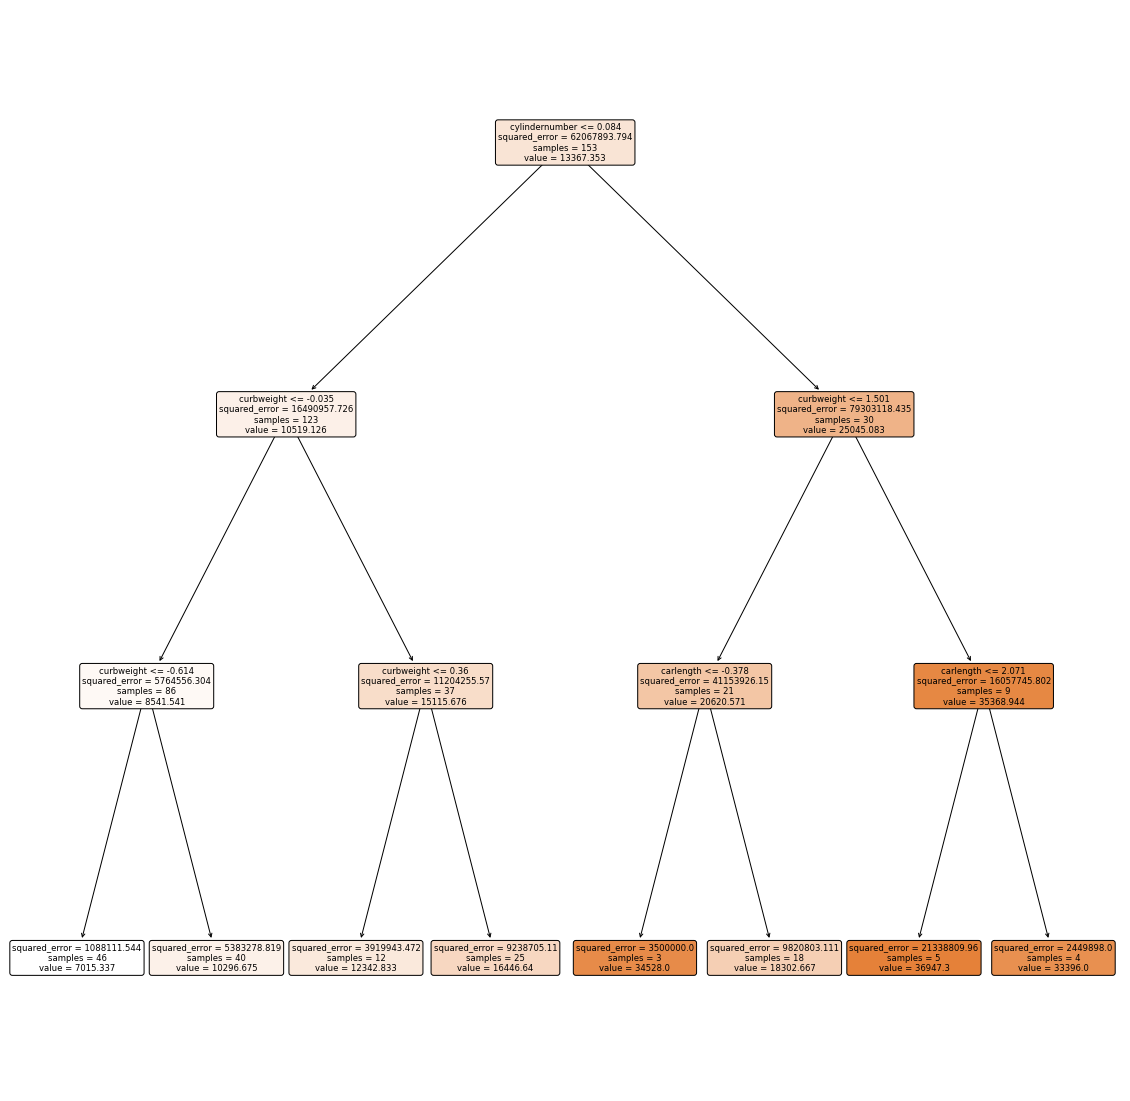

In [16]:
from sklearn.tree import plot_tree # tree diagram


regressor = DecisionTreeRegressor(random_state=42, max_depth = 3) 
  
regressor.fit(X_train[['cylindernumber','curbweight','carlength','carwidth']], y_train)

fig, ax = plt.subplots(figsize=(20, 20))  

plot_tree(regressor, 
          feature_names = ['cylindernumber','curbweight','carlength','carwidth'], 
          filled = True, 
          rounded = True)

plt.show()



><b> Comment interpréter cet arbre ? </b>
>
> *  Nous regardons dans un premier temps la valeur de `cylindernumber`, si elle est inférieure à 0.08, nous passons à gauche de l'arbre. Dans le cas contraire, nous passons à droite ;
> * Si nous sommes dans le sous-arbre de gauche, nous regardons à présent la variable `curbweight`. Si celle-ci est inférieure à -0.035, nous passons à gauche de l'arbre, sinon nous passons à droite;
>*  Nous faisons de même avec toutes les variables de décisions de chaque nœud dans lequel nous tombons jusqu'à arriver à une feuille, nous donnant la valeur de régression prédite.
>
> Nous avons affiché l'arbre avec les variables normalisées ce qui rends difficile l'interprétabilité : **à  quoi cela correspond dans la vraie vie lorsque `cylindernumber` < 0.08 ?** Pour que cela soit plus interprétable, nous affichons l'arbre de décision avec les données non normalisées juste en dessous comme dans le notebook précédent. 
>
><div class="alert alert-success">
<i class="fa fa-question-circle"></i> &emsp; 
    Nous faisons des prédictions et affichons l'arbre avec des données non normalisées car comme nous l'avons vu dans le <b> notebook 3 Modèles arbres et linéaires </b>, ce n'est pas utile de normaliser les données avec un arbre. 
</div>

* **(e)** Exécuter la cellule de code suivante pour afficher l'arbre de décision avec les données non normalisées.



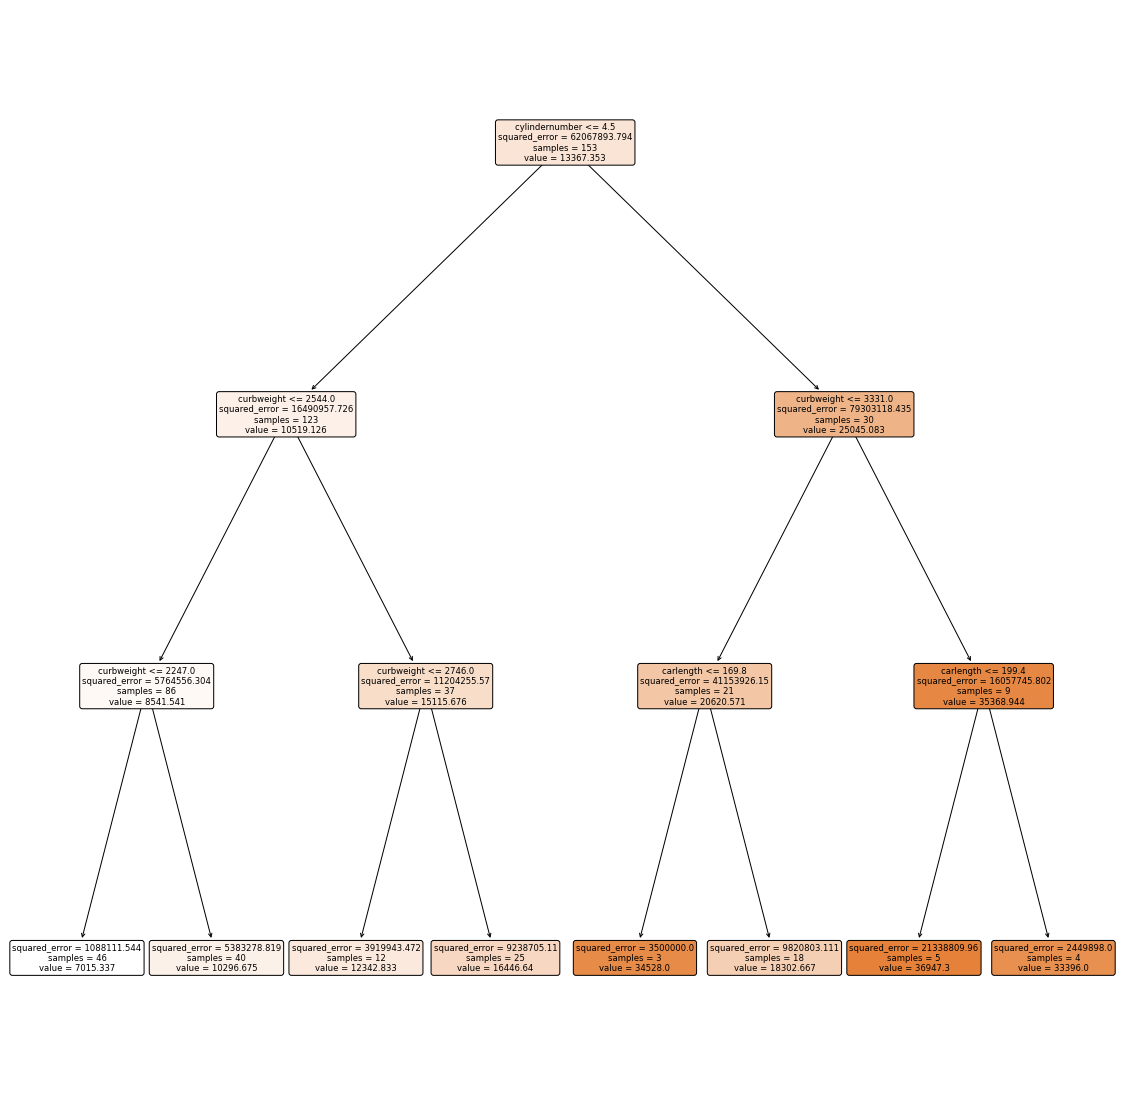

In [17]:
from sklearn.tree import plot_tree # tree diagram


X_train_unscaled = X_train.copy()

# On rescale les données pour l'affichage 
X_train_unscaled[num] = sc.inverse_transform(X_train_unscaled[num])


regressor = DecisionTreeRegressor(random_state=42, max_depth = 3) 
  
X_train_unscaled_reduce = X_train_unscaled[['cylindernumber','curbweight','carlength','carwidth']]
    

regressor.fit(X_train_unscaled_reduce, y_train)

fig, ax = plt.subplots(figsize=(20, 20))  

plot_tree(regressor, 
          feature_names = ['cylindernumber','curbweight','carlength','carwidth'], 
          filled = True, 
          rounded = True)

plt.show()



><b> Comment interpréter cet arbre ? </b>
>
> C'est exactement la même logique que pour l'arbre avec les données **normalisées** :
> *  Nous regardons dans un premier temps la valeur de `cylindernumber`, si elle est inférieure à 4.5, nous passons à gauche de l'arbre. Dans le cas contraire, nous passons à droite ;
> * Si nous sommes dans le sous-arbre de gauche, nous regardons à présent la variable `curbweight`. Si celle-ci est inférieure à 2544, nous passons à gauche de l'arbre, sinon nous passons à droite;
>*  Nous faisons de même avec toutes les variables de décisions de chaque nœud dans lequel nous tombons jusqu'à arriver à une feuille, nous donnant la valeur de régression prédite.
><h4> 2.3. Random Forest Regressor </h4>
>
> Utilisons un dernier modèle, le `Random Forest` que nous avons vu précédemment, de manière à multiplier les modélisations et choisir la meilleure.

* **(a)** 
    * (1) Instancier un objet `RandomForestRegressor` de la bibliothèque `sklearn.ensemble` et entrainez le jeu de données d'entraînement.
    * (2) Afficher les scores d'entraînement et de test du modèle.



In [18]:
from sklearn.ensemble import RandomForestRegressor 
  
#X_train, X_test, y_train, y_test = train_test_split(feats[['cylindernumber','curbweight','carlength','carwidth']], target, test_size=0.25)


regressor = RandomForestRegressor(random_state=42) 
  
regressor.fit(X_train, y_train)

print(regressor.score(X_train,y_train))
print(regressor.score(X_test,y_test))

0.9816211956931296
0.8254926577143402


In [ ]:
from sklearn.ensemble import RandomForestRegressor 
  
#X_train, X_test, y_train, y_test = train_test_split(feats[['cylindernumber','curbweight','carlength','carwidth']], target, test_size=0.25)


regressor = RandomForestRegressor(random_state=42) 
  
regressor.fit(X_train, y_train)

print(regressor.score(X_train,y_train))
print(regressor.score(X_test,y_test))



<h3> 4. Un mot sur les métriques </h3> 

> Dans l'évaluation des modèles que nous avons faite plus haut, nous avons utilisé le score de détermination $R^2$ pour comparer les différents modèles entre eux. Cependant, cette valeur n'est pas forcément la plus optimale et la plus pertinente pour évaluer des modèles non linéaires. En effet, alors que cela permet d'évaluer la régression linéaire simple, elle n'est pas forcément adaptée aux modèles arbres ou aux modèles ensemblistes. Cela est dû au fait que ces méthodes présentent une grande variance et que cela biaise le score $R^2$. De plus, ce dernier ne porte pas forcément d'interprétation métier quant à l'erreur réelle de prédictions. Il convient donc d’utiliser d’autres métriques vues dans le <b>notebook 4 : Méthodologie </b> pour évaluer nos modèles : la **MSE**, la **RMSE** et la **MAE**. 
>
>* **MSE** 
>
>L'erreur quadratique moyenne (Mean Squared Error ou MSE) représente la moyenne de la **différence au carré** entre les valeurs originales et prédites dans l'ensemble de données. Elle mesure globalement **la variance des résidus**.
>
>* **RMSE** 
>
>L'erreur quadratique moyenne est **la racine carrée de l'erreur quadratique moyenne**. Elle mesure **l'écart-type des résidus**.
>
>* **MAE**
>
>L'erreur absolue moyenne représente la moyenne de la **différence absolue** entre les valeurs réelles et prédites dans l'ensemble de données. Elle mesure la moyenne des résidus dans l'ensemble de données.
>
> Comment interpréter ces métriques ? 
>
>Dans les faits, la **MAE** apporte plus d'informations métier sur la problématique. En effet, de toutes les métriques présentées ci-dessus, c'est la seule qui va nous donner une information directe sur l'erreur entre les prédictions et les valeurs réelles. Enfin, la **RMSE** est moins interprétable, elle sert souvent de comparaison entre plusieurs modèles.
>
> Il faut garder en tête que le choix de la métrique peut varier selon les cas de figure. L'analyse de performance des modèles peut différer selon les secteurs et applications. Il n'existe pas une seule métrique optimale. Il est par ailleurs possible de créer une métrique qui répond à nos propres critères, l'objectif étant avec cette mesure de pouvoir décider si le modèle est suffisamment performant pour être retenu dans un cas d'application bien spécifique.
>
> Ces métriques se retrouvent dans le sous-module `sklearn.metrics` : 
>    
> > * La **MSE** se calcule avec la fonction `mean_squared_error` du sous module **`sklearn.metrics`**  et s'utilise ainsi :
> >
> > ```python
    from sklearn.metrics import mean_squared_error
    mean_squared_error(y_true, predictions)
> > ```
> > > où : <br><br>
> > > **`y_true`** correspond aux vraies valeurs de la variable cible.<br><br>
> > > **`predictions`** correspond aux valeurs prédites par notre modèle.
> >
> > * La **MAE**  se calcule avec la fonction `mean_absolute_error` du sous module **`sklearn.metrics`** et s'utilise ainsi :
> >
> > ```python
    from sklearn.metrics import mean_absolute_error
    mean_absolute_error(y_true, predictions)
> > ```
> > > où : <br><br>
> > > **`y_true`** correspond aux vraies valeurs de la variable cible.<br><br>
> > > **`predictions`** correspond aux valeurs prédites par notre modèle.
> >
> > La **RMSE**, se calcule également avec la fonction `mean_squared_error` du sous module **`sklearn.metrics`** et s'utilise ainsi : 
> > 
> > ```python
    from sklearn.metrics import mean_squared_error
    mean_squared_error(y_true, predictions, squared = False)
> > ```
> > > où : <br><br>
> > > **`y_true`** correspond aux vraies valeurs de la variable cible.<br><br>
> > > **`predictions`** correspond aux valeurs prédites par notre modèle.
> >

**(a)**
   * (1) Calculer ces trois métriques sur le jeu d'entraînement et le jeu de test pour le `DecisionTreeRegressor`,
   * (2) Calculer ces trois métriques sur le jeu d'entraînement et le jeu de test pour le `RandomForestRegressor`,
   * (3) Stocker l'ensemble de ces mesures dans un `DataFrame` et l'afficher. 





In [19]:
import sklearn.metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### DecisionTree

regressor_decision_tree = DecisionTreeRegressor(random_state=42) 
  
regressor_decision_tree.fit(X_train, y_train)


y_pred_decision_tree = regressor_decision_tree.predict(X_test)
y_pred_train_decision_tree = regressor_decision_tree.predict(X_train)

# Calcul des métriques

# jeu d'entraînement 
mae_decision_tree_train = mean_absolute_error(y_train,y_pred_train_decision_tree)
mse_decision_tree_train = mean_squared_error(y_train,y_pred_train_decision_tree,squared=True)
rmse_decision_tree_train = mean_squared_error(y_train,y_pred_train_decision_tree,squared=False)

# jeu de test 
mae_decision_tree_test = mean_absolute_error(y_test,y_pred_decision_tree)
mse_decision_tree_test = mean_squared_error(y_test,y_pred_decision_tree,squared=True)
rmse_decision_tree_test = mean_squared_error(y_test,y_pred_decision_tree,squared=False)


### RandomForest

regressor_random_forest = RandomForestRegressor(random_state=42) 
  
regressor_random_forest.fit(X_train, y_train)

# Calcul des métriques 
y_pred_random_forest = regressor_random_forest.predict(X_test)
y_pred_random_forest_train = regressor_random_forest.predict(X_train)


# jeu d'entraînement 
mae_random_forest_train = mean_absolute_error(y_train,y_pred_random_forest_train)
mse_random_forest_train = mean_squared_error(y_train,y_pred_random_forest_train,squared=True)
rmse_random_forest_train = mean_squared_error(y_train,y_pred_random_forest_train,squared=False)

# jeu de test 
mae_random_forest_test = mean_absolute_error(y_test,y_pred_random_forest)
mse_random_forest_test = mean_squared_error(y_test,y_pred_random_forest,squared=True)
rmse_random_forest_test = mean_squared_error(y_test,y_pred_random_forest,squared=False)


# Creation d'un dataframe pour comparer les metriques des deux algorithmes 
data = {'MAE train': [mae_decision_tree_train, mae_random_forest_train],
        'MAE test': [mae_decision_tree_test, mae_random_forest_test],
        'MSE train': [mse_decision_tree_train,mse_random_forest_train],
        'MSE test': [mse_decision_tree_test,mse_random_forest_test],
        'RMSE train': [rmse_decision_tree_train, rmse_random_forest_train],
        'RMSE test': [rmse_decision_tree_test, rmse_random_forest_test]}
  
# Creer DataFrame
df = pd.DataFrame(data, index = ['Decision Tree', 'Random Forest '])

df.head()

,MAE train,MAE test,MSE train,MSE test,RMSE train,RMSE test
Decision Tree,67.712418,2084.628212,8.457696e+04,1.085707e+07,290.821184,3295.006961
Random Forest,701.241160,2025.917429,1.140734e+06,1.180709e+07,1068.051344,3436.144054


In [ ]:
import sklearn.metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### DecisionTree

regressor_decision_tree = DecisionTreeRegressor(random_state=42) 
  
regressor_decision_tree.fit(X_train, y_train)


y_pred_decision_tree = regressor_decision_tree.predict(X_test)
y_pred_train_decision_tree = regressor_decision_tree.predict(X_train)

# Calcul des métriques

# jeu d'entraînement 
mae_decision_tree_train = mean_absolute_error(y_train,y_pred_train_decision_tree)
mse_decision_tree_train = mean_squared_error(y_train,y_pred_train_decision_tree,squared=True)
rmse_decision_tree_train = mean_squared_error(y_train,y_pred_train_decision_tree,squared=False)

# jeu de test 
mae_decision_tree_test = mean_absolute_error(y_test,y_pred_decision_tree)
mse_decision_tree_test = mean_squared_error(y_test,y_pred_decision_tree,squared=True)
rmse_decision_tree_test = mean_squared_error(y_test,y_pred_decision_tree,squared=False)


### RandomForest

regressor_random_forest = RandomForestRegressor(random_state=42) 
  
regressor_random_forest.fit(X_train, y_train)

# Calcul des métriques 
y_pred_random_forest = regressor_random_forest.predict(X_test)
y_pred_random_forest_train = regressor_random_forest.predict(X_train)


# jeu d'entraînement 
mae_random_forest_train = mean_absolute_error(y_train,y_pred_random_forest_train)
mse_random_forest_train = mean_squared_error(y_train,y_pred_random_forest_train,squared=True)
rmse_random_forest_train = mean_squared_error(y_train,y_pred_random_forest_train,squared=False)

# jeu de test 
mae_random_forest_test = mean_absolute_error(y_test,y_pred_random_forest)
mse_random_forest_test = mean_squared_error(y_test,y_pred_random_forest,squared=True)
rmse_random_forest_test = mean_squared_error(y_test,y_pred_random_forest,squared=False)


# Creation d'un dataframe pour comparer les metriques des deux algorithmes 
data = {'MAE train': [mae_decision_tree_train, mae_random_forest_train],
        'MAE test': [mae_decision_tree_test, mae_random_forest_test],
        'MSE train': [mse_decision_tree_train,mse_random_forest_train],
        'MSE test': [mse_decision_tree_test,mse_random_forest_test],
        'RMSE train': [rmse_decision_tree_train, rmse_random_forest_train],
        'RMSE test': [rmse_decision_tree_test, rmse_random_forest_test]}
  
# Creer DataFrame
df = pd.DataFrame(data, index = ['Decision Tree', 'Random Forest '])

df.head()




> En comparant les résultats entre les données de test et d'entraînement nous remarquons un réel écart : l'arbre de décision et les forêts aléatoires ont généré de l'*overfitting*. Notre **MSE** est très élevé, mais cela est à mettre en lien avec l'ordre de grandeur de la variable cible : le prix des voitures est compris entre 5118 et 45400.
>
>  En regardant la métrique la plus interprétable (MAE), nous pouvons conclure qu'en moyenne, le modèle  `DecisionTree` se trompe de 2084 unités sur la prédiction du prix de la voiture et le modèle `RandomForest` de 2025 unités. Nous pouvons également voir que le score de RMSE est très élevé, ce qui nous permet de dire que notre modèle n'est pas forcément le meilleur vis à vis de cette métrique. 

<h3> 5. Conclusion </h3> 

>On observe que les résultats les plus élevés sur les données d'entraînement et de test sont fournis avec le modèle `DecisionTree`. Pour aller plus loin, nous pourrions essayer d'optimiser les paramètres de chacun des modèles afin d'avoir le meilleur score possible tout en tentant de réduire l'*overfitting*.
> <h4> 5.1 A retenir</h4>
>
> - Il existe plusieurs manières de résoudre un problème de régression, nous donnant à chaque fois de nouvelles manières d'interpréter et des résultats différents.
> - Les coefficients donnés par la régression linéaire simple permettent de donner l'impact de la modification des variables sur le prix de la voiture. De manière parallèle, nous pouvons retrouver de l'information sur les différentes variables et leur importance grâce à l'importance calculée sur les méthodes arbres et les méthodes ensemblistes.
> - Le score $R^{2}$ n'est pas la métrique à privilégier si on applique un modèle non-linéaire : on préfèrera la **MSE**, la **MAE** et le **RMSE**.
> - Le résultat des métriques est à mettre en relation avec l'ordre de grandeur de la variable cible que l'on cherche à prédire. 


<h3> 6. Bonus : la pipeline Scikit-Learn </h3>

> Comme lors de la partie **classification**, vous avez vu dans le notebook 4 les pipelines **Scikit-Learn** : elles permettent de **condenser le code** et de **centraliser toutes les opérations de transformation**. 
>
> Voici un exemple : 

(a) Exécuter la cellule suivante pour entraîner la **pipeline** et afficher le résultat.



In [20]:
numeric_variables = ['doornumber', 'cylindernumber', 'wheelbase', 'carlength','carwidth', 'carheight', 'curbweight']
categorical_variables = ['fueltype', 'aspiration']

X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.25, random_state = 42)

# Column Tranformer pour appliquer les transformations sur certaines colonnes
preprocessor = ColumnTransformer(
    transformers = [
        # Standardisation sur les variables numériques
        ("Scaling numeric variables", StandardScaler() , numeric_variables), 
        # Encodage des données sur les variables catégorielles
        ("Encoding categorical variables",OneHotEncoder(drop = 'first'), categorical_variables)
    ])


# Pipeline de regroupement
clf = Pipeline(
    steps=[("preprocessor", preprocessor), 
           ("regression", DecisionTreeRegressor())]
    )


clf.fit(X_train, y_train)

y_pred_decision_tree = clf.predict(X_test)

mae_decision_tree_train = mean_absolute_error(y_test,y_pred_decision_tree)

print("model mae: %.3f" % mae_decision_tree_train)


model mae: 2146.013



>Le **`ColumnTranformer`** `preprocessor` permet de spécifier que les opérations vont s'effectuer uniquement sur certaines colonnes: 
> * Un `StandardScaler` sur les variables `'doornumber'`, `'cylindernumber'`, `'wheelbase'`, `'carlength'`,`'carwidth'`, `'carheight'`, `'curbweight'`, 
> * Un `OneHotEncoder` sur les variables `'fueltype'`et `'aspiration'`, 
>
>La **`Pipeline`** `clf` permet de rassembler ses transformations et d'entraîner un modèle de régression, ici le `DecisionTreeRegressor`. 
>

 
